<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
print(boston_df.columns)
boston_df.head()

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

In [8]:
boston_df.info

<bound method DataFrame.info of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       

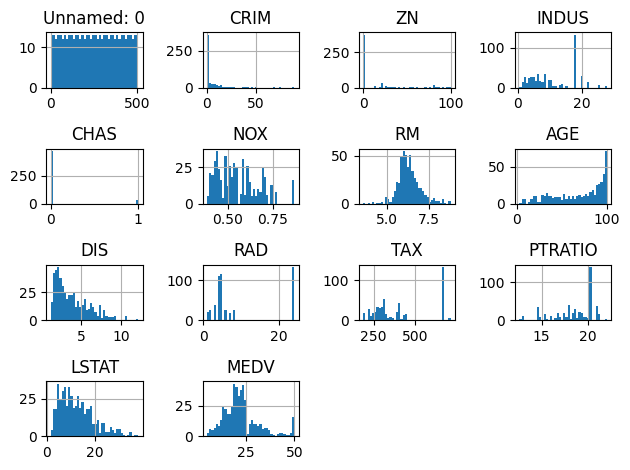

In [9]:
boston_df.hist(bins=40)
plt.tight_layout()

Text(0.5, 1.0, "MEDV: Median value of owner-occupied homes in $1000's")

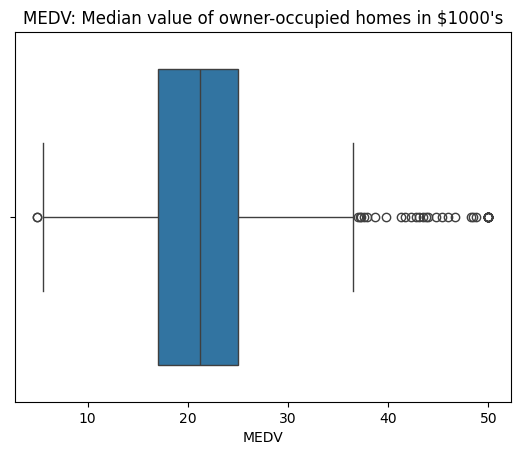

In [10]:
ax=sns.boxplot(x=boston_df["MEDV"])
ax.set_title("MEDV: Median value of owner-occupied homes in $1000's")

In [11]:
#ax=sns.barplot(boston_df["CHAS"])
#ax.set_title("CHAS: Charles River dummy variable (1 if track bounds river; 0 otherwise")

In [12]:
#boston_df['CHAS'].sum()

In [13]:
#ax=sns.distplot(boston_df["CHAS"], kde=False)
#ax.set_title("CHAS: Charles River dummy variable (1 if track bounds river; 0 otherwise)")

In [14]:
##axx = sns.distplot(boston_df["CHAS"], kde=False)
##for i in axx.containers:
##    axx.bar_label(i, )

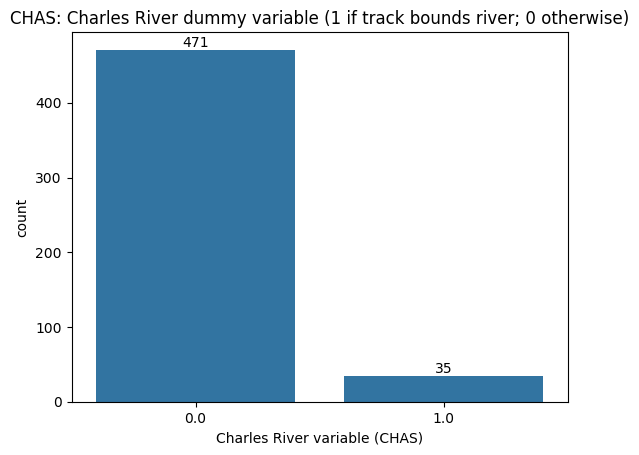

In [15]:
ax = sns.countplot(boston_df, x="CHAS")
ax.set(   
    xlabel="Charles River variable (CHAS)")
for i in ax.containers:
    ax.bar_label(i, )
ax.set_title("CHAS: Charles River dummy variable (1 if track bounds river; 0 otherwise)")
pyplot.show()

In [16]:
bins = [0, 35, 70, boston_df["AGE"].max()]  # Upper bounds for each group (exclusive)
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

In [17]:
boston_df[boston_df["age_group"]=="35 years and younger"].shape[0] + boston_df[boston_df["age_group"]=="Between 35 and 70 years"].shape[0] + boston_df[boston_df["age_group"]=="70 years and older"].shape[0]

506

Text(0.5, 0, 'MEDV: Median value of owner-occupied homes in $1000')

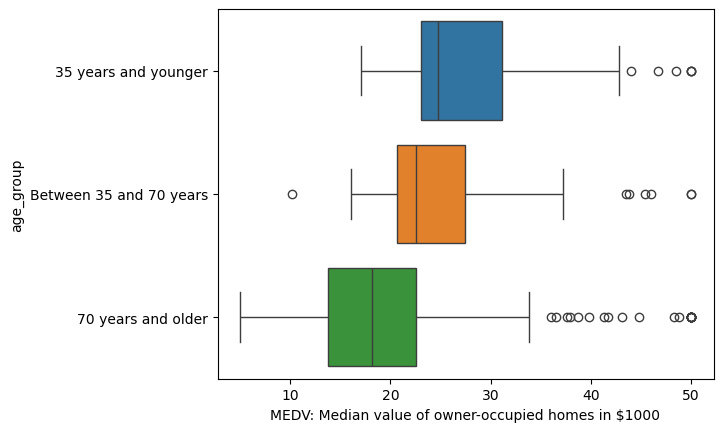

In [39]:
#sns.boxplot(boston_df["MEDV"], hue = age_group)
sns.boxplot(x = "MEDV", y = "age_group", hue = "age_group", data=boston_df)
plt.xlabel("MEDV: Median value of owner-occupied homes in $1000")

Text(0.5, 1.0, 'Relationship between Ntric Oxide Concentrations and the proportion of non-retail business acres per town. ')

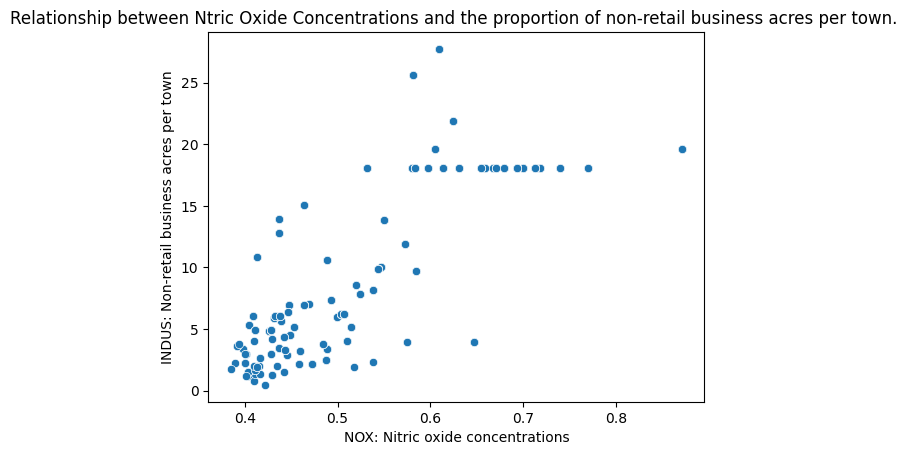

In [19]:
sns.scatterplot(x = "NOX", y = "INDUS", data=boston_df)
plt.xlabel("NOX: Nitric oxide concentrations")
plt.ylabel("INDUS: Non-retail business acres per town")
plt.title("Relationship between Ntric Oxide Concentrations and the proportion of non-retail business acres per town. ")

Text(0.5, 1.0, 'Histogram for Pupil to Teacher Ratio')

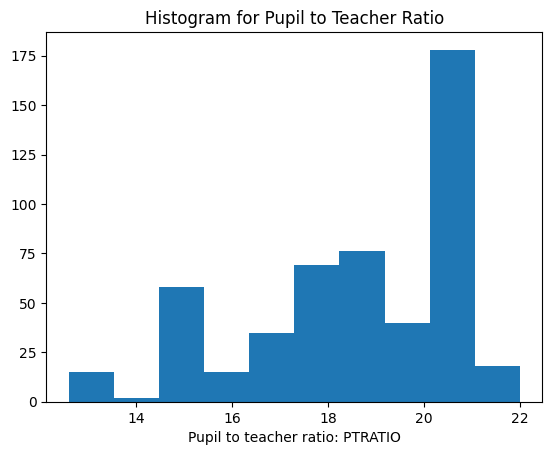

In [20]:
plt.hist(boston_df["PTRATIO"])#, bins=10)
plt.xlabel("Pupil to teacher ratio: PTRATIO")
plt.title("Histogram for Pupil to Teacher Ratio")
#sns.histplot(boston_df["PTRATIO"])

In [21]:
bold_start = "\033[1m"
bold_end = "\033[0m"
large_font = "\033[94m" 
print(bold_start + "THis histogram chart looks like right-skewd normal distribution")

THis histogram chart looks like right-skewd normal distribution


####
#### STATISTICAL ANALYSI
#### NULL HYPOTHESIS: 
#### there is no difference between median value of houses bounded by the Charles River or not.
#### ALTERNATIVE HYPOTHESIS: 
#### there is a significant difference between the median value of houses bounded by the Charles River or not. 


In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [40]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start +"\nCONCLUSION: \n\nComparing this calcuated p-value with 0.05 we see that \np-value is very much smaller, therefore  \n\n WE REJECT THE NULL HYPOTHSIS. \n\n Thus there is a diffrence between houses values based on their relative location to the river.\n\n" + bold_end) 


CONCLUSION: 

Comparing this calcuated p-value with 0.05 we see that 
p-value is very much smaller, therefore  

 WE REJECT THE NULL HYPOTHSIS. 

 Thus there is a diffrence between houses values based on their relative location to the river.




####
#### STATISTICAL ANALYSIS: Median value of houses for each proportion of owner occupied units built prior to 1940
#### NULL HYPOTHESIS: 
#### there is NO difference in the median value of houses for each proportion of owner occupied units built prior to 1940.
#### ALTERNATIVE HYPOTHESIS: 
#### there is a difference in the median value of houses for each proportion of owner occupied units built prior to 1940.

In [24]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start +"BASED ON MY RESEARCH THIS DATASET WAS PRODUCED IN MID 70's.\nTHUS HOUSES BUILD PRIOR TO 1940 WERE HOUSES OVER 35 YEARS OLD.\nTHEREFORE I USE THE STRATIFIED AGE COLUMN I MADE FOR ONE OF THE EARLIER QUESTIONS, \nWHERE HOUSES WERE CATEGORIZED IN THREE GROUPS YOUNGER THAN 35 YEARS, OLDER THAT 70 YEARS, AND THE REST" + bold_end)

BASED ON MY RESEARCH THIS DATASET WAS PRODUCED IN MID 70's.
THUS HOUSES BUILD PRIOR TO 1940 WERE HOUSES OVER 35 YEARS OLD.
THEREFORE I USE THE STRATIFIED AGE COLUMN I MADE FOR ONE OF THE EARLIER QUESTIONS, 
WHERE HOUSES WERE CATEGORIZED IN THREE GROUPS YOUNGER THAN 35 YEARS, OLDER THAT 70 YEARS, AND THE REST


In [25]:
#boston_df["age_group"].unique

In [26]:
after_1940 = boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"]
prior_1940_1 = boston_df[boston_df["age_group"] == "Between 35 and 70 years"]["MEDV"]
way_prior_1940 = boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"]
scipy.stats.f_oneway(after_1940,prior_1940_1,way_prior_1940,axis=0)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [27]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(bold_start +"\nCONCLUSION: \n\nWe note that p-value is a very, very small number.\n\nThus, WE REJECT THE NULL HYPOTHESIS. \n\nThere is a diffrence between houses values prior to 1940\n\n", bold_end)


CONCLUSION: 

We note that p-value is a very, very small number.

Thus, WE REJECT THE NULL HYPOTHESIS. 

There is a diffrence between houses values prior to 1940

 


####
#### STATISTICAL ANALYSIS: Nitric oxide concentration and proportion of non-retail business acres per town
#### NULL HYPOTHESIS: 
#### no relationship between nitric oxide concentrations and proportion of non-retail business acres per town.
#### ALTERNATIVE HYPOTHESIS: 
#### there is evidence of relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

In [28]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [29]:
print(bold_start + "\nCONCLUSION: \n\nAgain, we note that p-value is really, really small. \n\nThus, WE REJECT THE NULL HYPOTHESIS. \n\nTherefore, there is evidence that ntiric oxide and business condensation are related\n\n", bold_end)


CONCLUSION: 

Again, we note that p-value is really, really small. 

Thus, WE REJECT THE NULL HYPOTHESIS. 

Therefore, there is evidence that ntiric oxide and business condensation are related

 


In [30]:
print(bold_start + "\nTHE FINAL QUESTION\n" + bold_end)


THE FINAL QUESTION



####
#### STATISTICAL ANALYSIS: The impact of, DIS, an additional weighted distance to the five Boston employment centres on, MEDV, the median value of owner occupied homes.
#### NULL HYPOTHESIS
####  no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. 
#### ALTERNATIVE HYPOTHESIS: 
#### There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes

In [31]:
X = boston_df["DIS"]
Y = boston_df["MEDV"]

In [32]:
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        06:54:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print(bold_start,"COEFICIENT ANALYSIS: \n\nWe note that the 'DIS coef' is 1.0916	, \nwhich means an adition of 1 unit distance to the Boston emplyment centers (DIS), \nwould result in an increase of 1.0916 * 1000 $ in median value of owner occupied houses increases", bold_end)

 COEFICIENT ANALYSIS: 

We note that the 'DIS coef' is 1.0916	, 
which means an adition of 1 unit distance to the Boston emplyment centers (DIS), 
would result in an increase of 1.0916 * 1000 $ in median value of owner occupied houses increases 


In [34]:
print(bold_start,"\nCONCLUSION: \n\nWE REJECT THE NULL HYPOTHESIS.\n\nWe conclude that:\n\nweighted distance of the five Boston employment centres \nIMPACTS \nthe median value of owner occupied houses in a positive and pretty significant way.", bold_end)

 
CONCLUSION: 

WE REJECT THE NULL HYPOTHESIS.

We conclude that:

weighted distance of the five Boston employment centres 
IMPACTS 
the median value of owner occupied houses in a positive and pretty significant way. 
